# 🎯 SVM Cancer Risk Prediction

Support Vector Machine (SVM) implementation for predicting cancer risk levels.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

## 📂 Load Data

In [2]:
# Load cleaned data
df = pd.read_csv("cleaned_cancer_data.csv")
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (2000, 20)


,Cancer_Type,Age,Gender,Smoking,Alcohol_Use,Obesity,Family_History,Diet_Red_Meat,Diet_Salted_Processed,Fruit_Veg_Intake,Physical_Activity,Air_Pollution,Occupational_Hazards,BRCA_Mutation,H_Pylori_Infection,Calcium_Intake,Overall_Risk_Score,BMI,Physical_Activity_Level,Risk_Level
0,Breast,68,0,7,2,8,0,5,3,7,4,6,3,1,0,0,0.398696,28.0,5,Medium
1,Prostate,74,1,8,9,8,0,0,3,7,1,3,3,0,0,5,0.424299,25.4,9,Medium
2,Skin,55,1,7,10,7,0,3,3,4,1,8,10,0,0,6,0.605082,28.6,2,Medium
3,Colon,61,0,6,2,2,0,6,2,4,6,4,8,0,0,8,0.318449,32.1,7,Low
4,Lung,67,1,10,7,4,0,6,3,10,9,10,9,0,0,5,0.524358,25.1,2,Medium


## 🎯 Prepare Features and Target

In [3]:
# Use Risk_Level as target (the dataset's primary objective)
target_col = "Risk_Level"

# Drop columns with data leakage
cols_to_drop = [
    target_col,           # Target variable
    "Cancer_Type",        # For diagnosed cases only
    "Overall_Risk_Score"  # Computed from other features (data leakage)
]

y = df[target_col]
X = df.drop(columns=cols_to_drop)

print(f"Features: {X.shape[1]}")
print(f"Target distribution:\n{y.value_counts()}")

Features: 17
Target distribution:
Risk_Level
Medium    1574
Low        324
High       102
Name: count, dtype: int64


## ✂️ Train-Test Split

In [4]:
# Split data with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

Training set: (1600, 17)
Test set: (400, 17)


## 🔄 Feature Scaling

**CRITICAL for SVM**: SVMs are sensitive to feature scales!

In [5]:
# Scale features (ESSENTIAL for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features scaled successfully!")

Features scaled successfully!


## 🤖 SVM Models with Different Kernels

### 1️⃣ Linear SVM

In [6]:
# Linear kernel - good for linearly separable data
svm_linear = SVC(kernel='linear', C=1.0, random_state=42)
svm_linear.fit(X_train_scaled, y_train)

# Predictions
y_pred_linear = svm_linear.predict(X_test_scaled)

# Results
print("=" * 50)
print("LINEAR SVM RESULTS")
print("=" * 50)
print(f"Train Accuracy: {svm_linear.score(X_train_scaled, y_train):.4f}")
print(f"Test Accuracy:  {svm_linear.score(X_test_scaled, y_test):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_linear))

LINEAR SVM RESULTS
Train Accuracy: 0.8919
Test Accuracy:  0.8900

Classification Report:
              precision    recall  f1-score   support

        High       0.45      0.25      0.32        20
         Low       0.85      0.78      0.82        65
      Medium       0.91      0.95      0.93       315

    accuracy                           0.89       400
   macro avg       0.74      0.66      0.69       400
weighted avg       0.88      0.89      0.88       400



### 2️⃣ RBF (Radial Basis Function) SVM

In [7]:
# RBF kernel - most popular, handles non-linear relationships
svm_rbf = SVC(kernel='rbf', C=10.0, gamma='scale', random_state=42)
svm_rbf.fit(X_train_scaled, y_train)

# Predictions
y_pred_rbf = svm_rbf.predict(X_test_scaled)

# Results
print("=" * 50)
print("RBF SVM RESULTS")
print("=" * 50)
print(f"Train Accuracy: {svm_rbf.score(X_train_scaled, y_train):.4f}")
print(f"Test Accuracy:  {svm_rbf.score(X_test_scaled, y_test):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rbf))

RBF SVM RESULTS
Train Accuracy: 0.9875
Test Accuracy:  0.8525

Classification Report:
              precision    recall  f1-score   support

        High       0.36      0.25      0.29        20
         Low       0.78      0.65      0.71        65
      Medium       0.89      0.93      0.91       315

    accuracy                           0.85       400
   macro avg       0.67      0.61      0.64       400
weighted avg       0.84      0.85      0.85       400



### 3️⃣ Polynomial SVM

In [8]:
# Polynomial kernel - captures polynomial relationships
svm_poly = SVC(kernel='poly', degree=3, C=1.0, gamma='scale', random_state=42)
svm_poly.fit(X_train_scaled, y_train)

# Predictions
y_pred_poly = svm_poly.predict(X_test_scaled)

# Results
print("=" * 50)
print("POLYNOMIAL SVM RESULTS")
print("=" * 50)
print(f"Train Accuracy: {svm_poly.score(X_train_scaled, y_train):.4f}")
print(f"Test Accuracy:  {svm_poly.score(X_test_scaled, y_test):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_poly))

POLYNOMIAL SVM RESULTS
Train Accuracy: 0.9200
Test Accuracy:  0.8250

Classification Report:
              precision    recall  f1-score   support

        High       0.60      0.15      0.24        20
         Low       0.72      0.35      0.47        65
      Medium       0.84      0.97      0.90       315

    accuracy                           0.82       400
   macro avg       0.72      0.49      0.54       400
weighted avg       0.81      0.82      0.80       400



## 🔍 Hyperparameter Tuning - GridSearch for Best RBF SVM

In [9]:
# Define parameter grid for RBF kernel
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]
}

# GridSearch with cross-validation
print("Running GridSearchCV... This may take a few minutes.")
grid_search = GridSearchCV(
    SVC(kernel='rbf', random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_scaled, y_train)

# Best parameters
print("\n" + "=" * 50)
print("BEST PARAMETERS FOUND")
print("=" * 50)
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best CV score: {grid_search.best_score_:.4f}")

# Best model
best_svm = grid_search.best_estimator_
y_pred_best = best_svm.predict(X_test_scaled)

print(f"\nTrain Accuracy: {best_svm.score(X_train_scaled, y_train):.4f}")
print(f"Test Accuracy:  {best_svm.score(X_test_scaled, y_test):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))

Running GridSearchCV... This may take a few minutes.
Fitting 5 folds for each of 24 candidates, totalling 120 fits

BEST PARAMETERS FOUND
Best parameters: {'C': 100, 'gamma': 0.001}
Best CV score: 0.8775

Train Accuracy: 0.8962
Test Accuracy:  0.9000

Classification Report:
              precision    recall  f1-score   support

        High       0.67      0.20      0.31        20
         Low       0.85      0.80      0.83        65
      Medium       0.91      0.97      0.94       315

    accuracy                           0.90       400
   macro avg       0.81      0.66      0.69       400
weighted avg       0.89      0.90      0.89       400



## 📊 Visualizations

### Confusion Matrices for All SVM Models

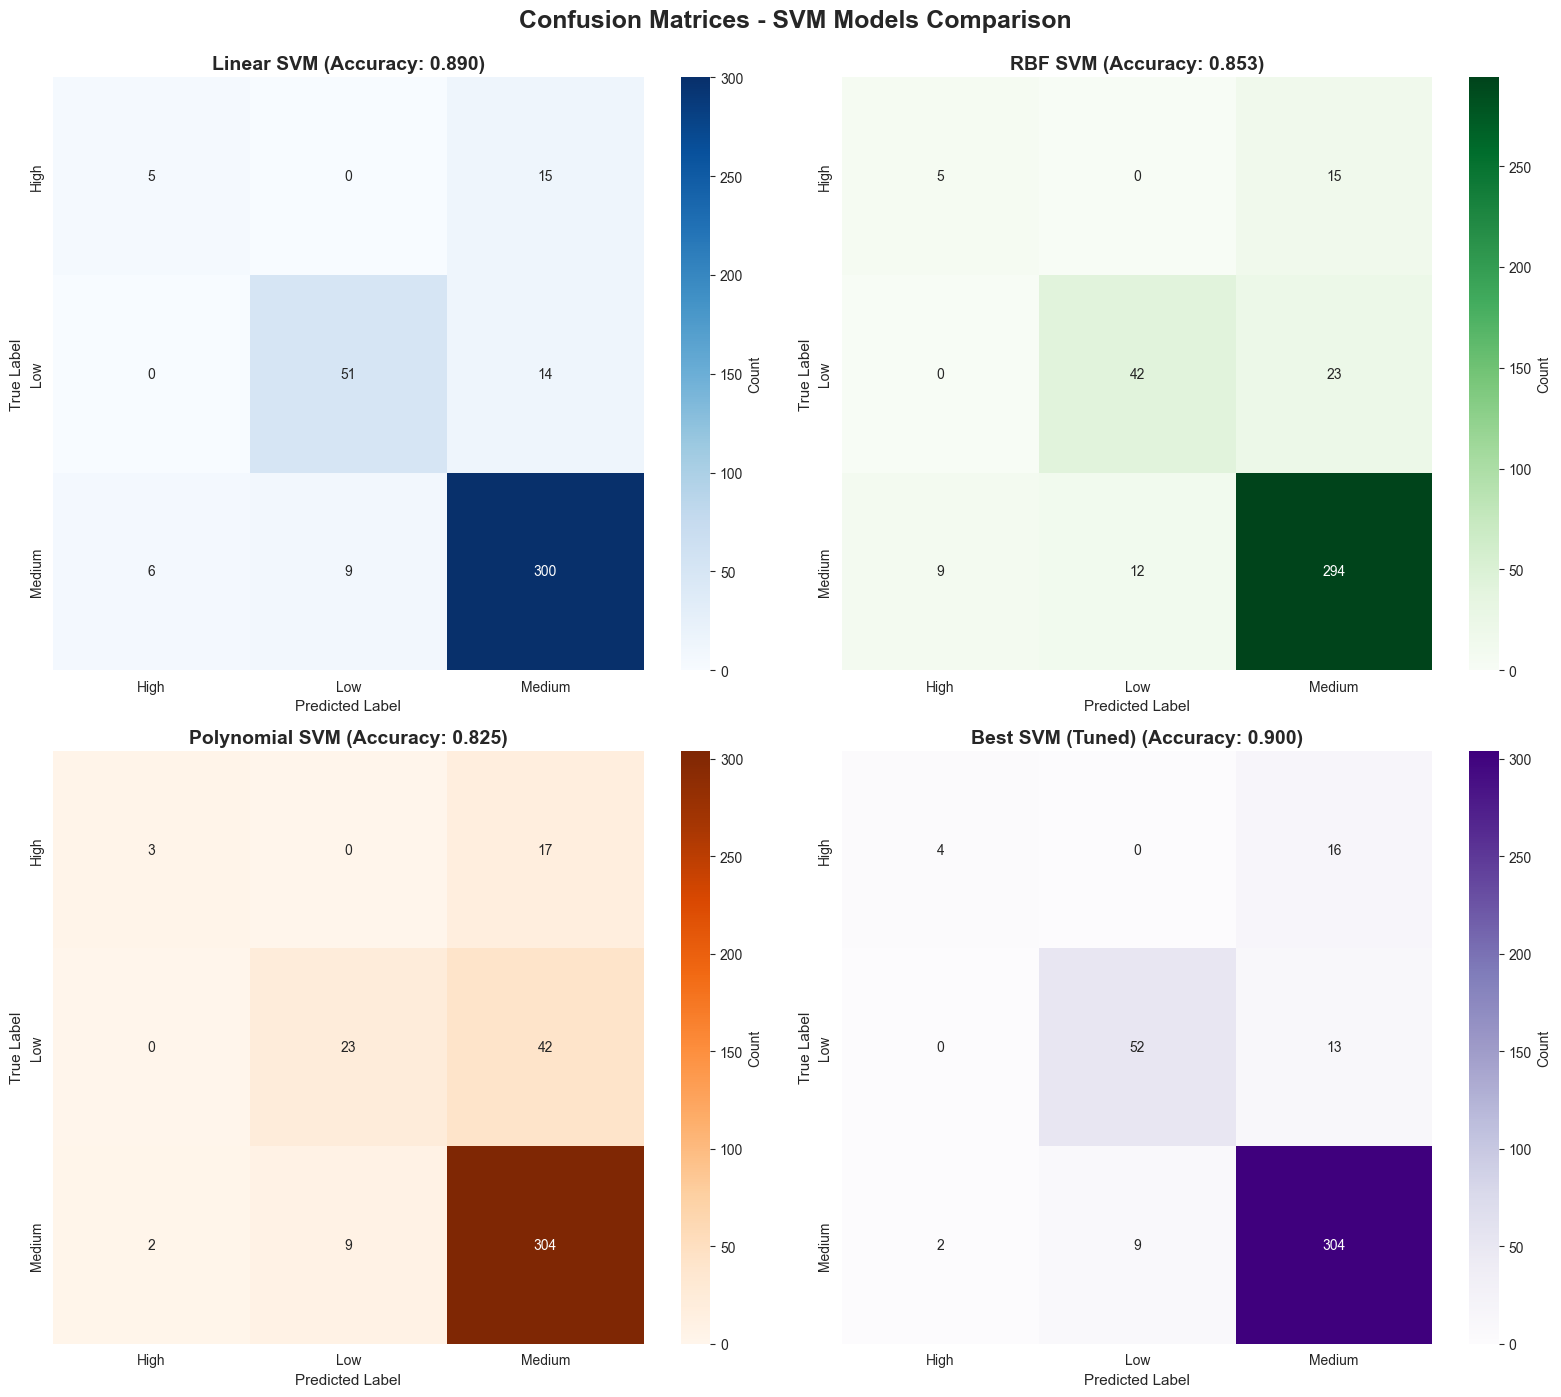

In [10]:
# Create confusion matrices for all models
fig, axes = plt.subplots(2, 2, figsize=(16, 14))
fig.suptitle('Confusion Matrices - SVM Models Comparison', fontsize=18, fontweight='bold', y=0.995)

models = [
    ('Linear SVM', y_pred_linear, 'Blues'),
    ('RBF SVM', y_pred_rbf, 'Greens'),
    ('Polynomial SVM', y_pred_poly, 'Oranges'),
    ('Best SVM (Tuned)', y_pred_best, 'Purples')
]

for idx, (name, y_pred, cmap) in enumerate(models):
    row = idx // 2
    col = idx % 2
    
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, 
                xticklabels=['High', 'Low', 'Medium'], 
                yticklabels=['High', 'Low', 'Medium'],
                ax=axes[row, col], cbar_kws={'label': 'Count'})
    
    # Calculate accuracy for title
    acc = accuracy_score(y_test, y_pred)
    axes[row, col].set_title(f'{name} (Accuracy: {acc:.3f})', fontsize=14, fontweight='bold')
    axes[row, col].set_ylabel('True Label', fontsize=11)
    axes[row, col].set_xlabel('Predicted Label', fontsize=11)

plt.tight_layout()
plt.show()

### Model Comparison - Accuracy Scores

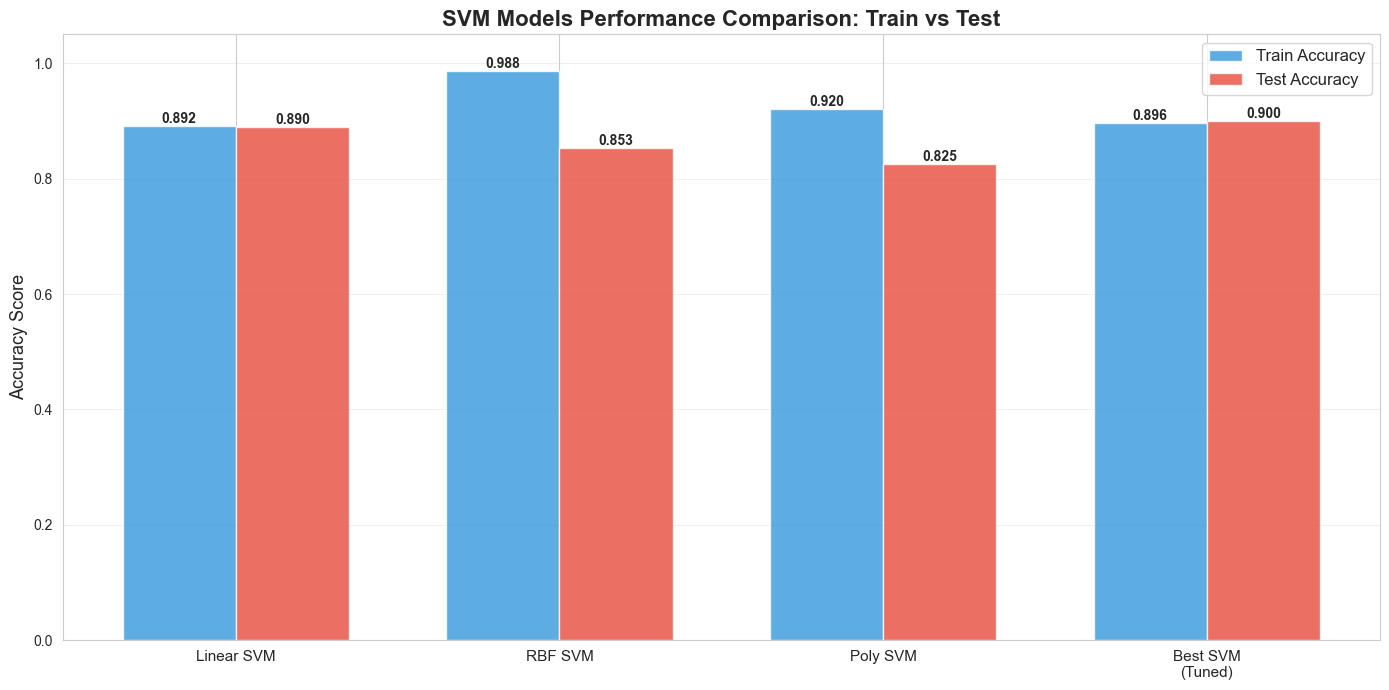

In [11]:
# Compare all models
model_names = ['Linear SVM', 'RBF SVM', 'Poly SVM', 'Best SVM\n(Tuned)']
train_scores = [
    svm_linear.score(X_train_scaled, y_train),
    svm_rbf.score(X_train_scaled, y_train),
    svm_poly.score(X_train_scaled, y_train),
    best_svm.score(X_train_scaled, y_train)
]
test_scores = [
    svm_linear.score(X_test_scaled, y_test),
    svm_rbf.score(X_test_scaled, y_test),
    svm_poly.score(X_test_scaled, y_test),
    best_svm.score(X_test_scaled, y_test)
]

x = np.arange(len(model_names))
width = 0.35

fig, ax = plt.subplots(figsize=(14, 7))
bars1 = ax.bar(x - width/2, train_scores, width, label='Train Accuracy', color='#3498db', alpha=0.8)
bars2 = ax.bar(x + width/2, test_scores, width, label='Test Accuracy', color='#e74c3c', alpha=0.8)

ax.set_ylabel('Accuracy Score', fontsize=13)
ax.set_title('SVM Models Performance Comparison: Train vs Test', fontsize=16, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(model_names, fontsize=11)
ax.legend(fontsize=12)
ax.set_ylim([0, 1.05])
ax.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

### Per-Class Performance - Best SVM Model

Per-Class Metrics for Best SVM:
Risk Level  Precision   Recall  F1-Score  Support
      High   0.666667 0.200000  0.307692       20
       Low   0.852459 0.800000  0.825397       65
    Medium   0.912913 0.965079  0.938272      315


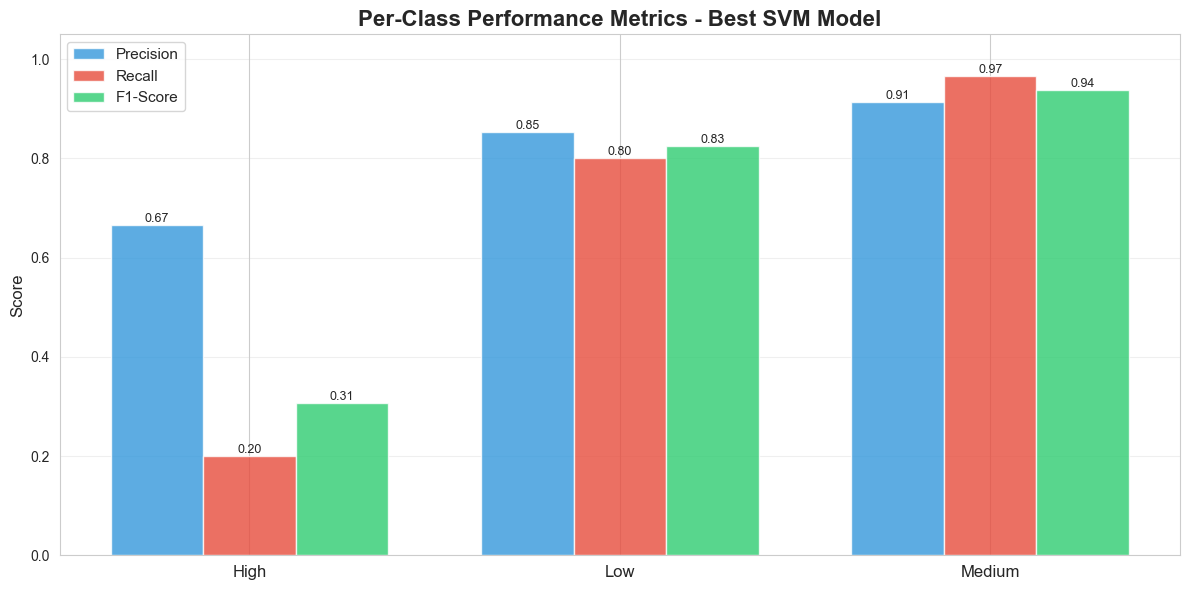

In [12]:
from sklearn.metrics import precision_recall_fscore_support

# Get per-class metrics for best model
precision, recall, f1, support = precision_recall_fscore_support(
    y_test, y_pred_best, labels=['High', 'Low', 'Medium']
)

metrics_df = pd.DataFrame({
    'Risk Level': ['High', 'Low', 'Medium'],
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1,
    'Support': support
})

print("Per-Class Metrics for Best SVM:")
print(metrics_df.to_string(index=False))

# Visualize per-class metrics
x = np.arange(len(metrics_df['Risk Level']))
width = 0.25

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width, metrics_df['Precision'], width, label='Precision', color='#3498db', alpha=0.8)
bars2 = ax.bar(x, metrics_df['Recall'], width, label='Recall', color='#e74c3c', alpha=0.8)
bars3 = ax.bar(x + width, metrics_df['F1-Score'], width, label='F1-Score', color='#2ecc71', alpha=0.8)

ax.set_ylabel('Score', fontsize=12)
ax.set_title('Per-Class Performance Metrics - Best SVM Model', fontsize=16, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(metrics_df['Risk Level'], fontsize=12)
ax.legend(fontsize=11)
ax.set_ylim([0, 1.05])
ax.grid(axis='y', alpha=0.3)

# Add value labels
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}',
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

### Prediction Distribution Comparison

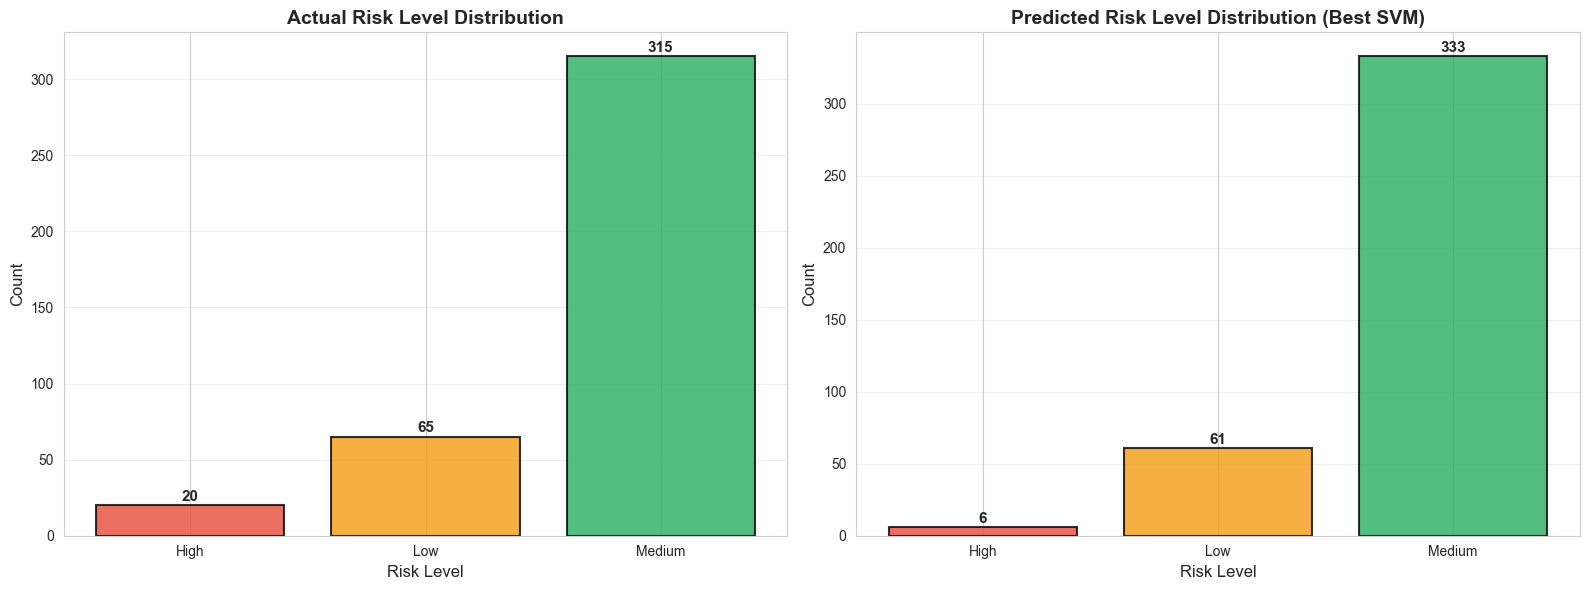

In [13]:
# Compare actual vs predicted distributions
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Actual distribution
actual_counts = y_test.value_counts().sort_index()
axes[0].bar(actual_counts.index, actual_counts.values, 
            color=['#e74c3c', '#f39c12', '#27ae60'], alpha=0.8, edgecolor='black', linewidth=1.5)
axes[0].set_title('Actual Risk Level Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Risk Level', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].grid(axis='y', alpha=0.3)
for i, v in enumerate(actual_counts.values):
    axes[0].text(i, v + 3, str(v), ha='center', fontweight='bold', fontsize=11)

# Predicted distribution (Best SVM)
pred_counts = pd.Series(y_pred_best).value_counts().sort_index()
axes[1].bar(pred_counts.index, pred_counts.values, 
            color=['#e74c3c', '#f39c12', '#27ae60'], alpha=0.8, edgecolor='black', linewidth=1.5)
axes[1].set_title('Predicted Risk Level Distribution (Best SVM)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Risk Level', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)
axes[1].grid(axis='y', alpha=0.3)
for i, v in enumerate(pred_counts.values):
    axes[1].text(i, v + 3, str(v), ha='center', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.show()

## 📝 Summary

### SVM Model Comparison:
- **Linear SVM**: Good baseline, assumes linear separability
- **RBF SVM**: Handles non-linear patterns, most versatile
- **Polynomial SVM**: Captures polynomial relationships
- **Tuned SVM**: Best hyperparameters found via GridSearch

### Key Findings:
1. Feature scaling is **critical** for SVM performance
2. RBF kernel typically performs best for complex data
3. Hyperparameter tuning (C, gamma) significantly improves results
4. Watch for overfitting (train >> test accuracy)

### Next Steps:
- Compare SVM with Random Forest and Decision Tree models
- Try ensemble methods combining multiple models
- Feature engineering for better predictions